In [7]:
import numpy as np
import cv2 as cv
import glob
from pprint import pprint

# Define chessboard dimensions
CHESSBOARD_WIDTH = 5
CHESSBOARD_HEIGHT = 7

# Termination criteria for corner detection
termination_criteria = (cv.TERM_CRITERIA_EPS +
                        cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Prepare object points, like (0, 0, 0), (1, 0, 0), (2, 0, 0), ..., (6, 5, 0)
object_points = np.zeros((CHESSBOARD_WIDTH * CHESSBOARD_HEIGHT, 3), np.float32)
object_points[:, :2] = np.mgrid[0:CHESSBOARD_WIDTH,
                                0:CHESSBOARD_HEIGHT].T.reshape(-1, 2)

# Arrays to store object points and image points from all the images
world_points = []  # 3D point in real-world space
image_points = []  # 2D points in image plane

video_capture = cv.VideoCapture('video/out2F.mp4') # Video file

frame_skip = 300

frame_count = 0
new_resolution = (640, 480)

while True:
    ret, img = video_capture.read()
    if not ret:
        break
    
    if frame_count % frame_skip == 0:
        img = cv.resize(img, new_resolution)
        gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        
        # Find the chessboard corners
        found_corners, corners = cv.findChessboardCorners(
            gray, (CHESSBOARD_WIDTH, CHESSBOARD_HEIGHT), None)
        print("Frame #" + str(frame_count) + ": " + str(found_corners))
        # If corners are found, add object points and image points (after refining them)
        if found_corners == True:
            refined_corners = cv.cornerSubPix(
                    gray, corners, (11, 11), (-1, -1), termination_criteria)
            cv.drawChessboardCorners(
                img, (CHESSBOARD_WIDTH, CHESSBOARD_HEIGHT), refined_corners, found_corners)
            # cv.imshow('img', img)
            # wait_key = cv.waitKey(0)
            # if wait_key == ord('n'):
            #     continue
            # elif wait_key == ord('y'):
            #     world_points.append(object_points) # 3D point in real-world space
            #     # print(np.array_equal(corners, refined_corners))
            #     image_points.append(refined_corners)
            # else:
            #     break
            world_points.append(object_points) # 3D point in real-world space
            image_points.append(refined_corners)
        else:
            print("No corners found")
    frame_count += 1
            
video_capture.release()
cv.destroyAllWindows()

Frame #0: True
Frame #300: True
Frame #600: True
Frame #900: True
Frame #1200: True
Frame #1500: True
Frame #1800: True
Frame #2100: True


KeyboardInterrupt: 

Camera matrix:
[[519.40796866   0.         286.92114106]
 [  0.         655.00588326 294.24884687]
 [  0.           0.           1.        ]]

Distortion coefficients:
[[-0.62171432  0.36148857 -0.07291128  0.02480563 -0.10370052]]

Rotation vectors:
(array([[-0.17496038],
       [-0.62421722],
       [ 3.00130885]]), array([[-0.10389178],
       [-0.43978636],
       [ 3.00579067]]), array([[ 0.36198824],
       [ 0.20029932],
       [-0.00352701]]), array([[ 0.35129564],
       [ 0.67533119],
       [-0.01988156]]), array([[-0.3229957 ],
       [-0.10478511],
       [ 2.94109517]]), array([[ 0.20607735],
       [ 0.04951105],
       [-3.2629527 ]]), array([[-0.65697245],
       [ 0.55833678],
       [-3.03130483]]), array([[ 0.27734406],
       [-0.48261802],
       [ 2.99492422]]))

Translation vectors:
(array([[-0.43173565],
       [ 3.16401443],
       [25.62446852]]), array([[-7.59772258],
       [ 7.54716239],
       [29.49944935]]), array([[-2.30013058],
       [ 0.1345182 ],
 

Text(0.5, 1.0, 'Undistorted Image')

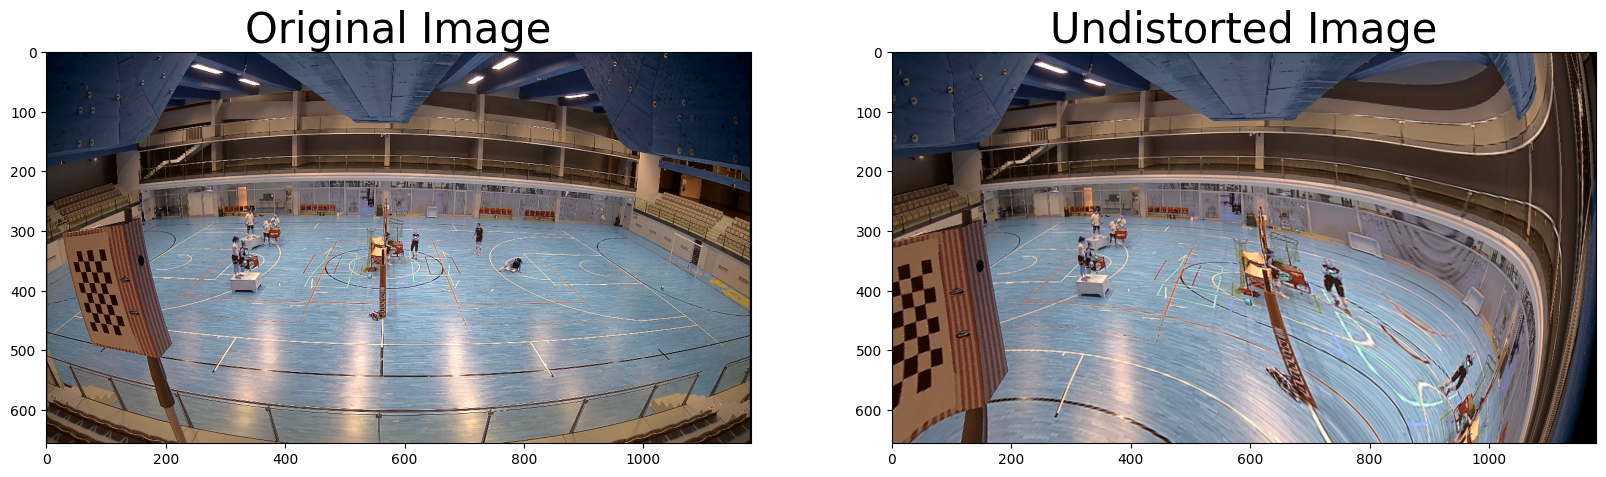

In [10]:
import matplotlib.pyplot as plt
import cv2 as cv
# for i in range(len(image_points)):
#     print("Image #" + str(i+1) + ":\n")
#     print("Image points:\n")
#     pprint(image_points[i].tolist())
#     print("\nWorld points:\n")
#     pprint(world_points[i].tolist())
#     print("\n")

# Calibrate the camera
calibration_success, camera_matrix, distortion_coeffs, rotation_vecs, translation_vecs = cv.calibrateCamera(
    world_points, image_points, gray.shape[::-1], None, None)

# Print the calibration results
print("Camera matrix:")
print(camera_matrix)
print("\nDistortion coefficients:")
print(distortion_coeffs)
print("\nRotation vectors:")
print(rotation_vecs)
print("\nTranslation vectors:")
print(translation_vecs)

test_img = cv.imread("samples/prova.PNG")
img_size = (test_img.shape[1], test_img.shape[0])

# Get the optimal new camera matrix and region of interest
# optimal_camera_matrix, roi = cv.getOptimalNewCameraMatrix(
#     camera_matrix, distortion_coeffs,img_size, 1, img_size)

# Undistort
undistorted_img = cv.undistort(
    test_img, camera_matrix, distortion_coeffs, None, camera_matrix)

# Crop the image
# x, y, w, h = roi
# undistorted_img = undistorted_img[y:y+h, x:x+w]
cv.imwrite('result.png', undistorted_img)
# Show the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(test_img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(undistorted_img)
ax2.set_title('Undistorted Image', fontsize=30)